<a href="https://colab.research.google.com/github/sherlockieee/cs113/blob/main/Problem_set_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import common package
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from sympy import *

# Problem 1. Hereditary heights (#Probability)
We measure the heights of a family with a mother, a father, and 3 children (who are all
biologically related to the parents). Assume heights in the general population follow a $Normal(\mu, \sigma^2)$
distribution.

### Question 1.
This is an oversimplification but, for this part of the problem, assume the heights of the
family members are all independent. On average, how many of the 3 children are taller
than both parents?

In [2]:
"""
The probability of each children being taller than both parents = 1/3
This is because all three values follow the same normal distribution
=> Equal chance that any of the three values can be the tallest height

Hence expected number of children taller than both parents = 1/3 * 3 = 1
"""
answer = 1

Check your answer with a short simulation.


In [3]:
# Create a mean and and standard deviation
mean = 170
std = 8

# Number of trials
trials = 10000
count = 0

for _ in range(trials):
    # Sample from the normal distribution
    mother, father, kid1, kid2, kid3 = sts.norm(mean, std).rvs(size=5)
    # Check for each kid
    for kid in [kid1, kid2, kid3]:
        # Whether the kid is taller than both of their parents
        if kid > mother and kid > father:
            count += 1

print("Analytical answer = ", 1)
print("Stimulation answer = ", count/trials)




Analytical answer =  1
Stimulation answer =  1.0131


## Question 2.
For this part of the problem, assume the heights of the children are correlated with the
heights of the parents.
Let $M$ be the height of the mother, $F$ be the height of the father, and $X_1, X_2, X_3$ be
the heights of the three children. Suppose that $(M, F, X_1, X_2, X_3)$ is Multivariate
Normal, with $Normal(\mu, \sigma^2)$ marginals and $Corr(M, X_j) = ρ$ for $j ∈ {1, 2, 3}$
with $ρ < 1$.
On average, how many of the children are at least 1 centimeter taller than their mother?


Using the definition of Correlation and Covariance:
$$
\text{Corr}(𝑀,𝑋_𝑗) = ρ \\
\Rightarrow \text{Cov}(M, X_j)/ 𝜎^2 = ρ \\
\Rightarrow \text{Cov}(M, X_j) = ρ𝜎^2
$$

We are interested in finding
$P(X_j - M > 1)$
But since $X_j$ and $M$ both follow $N(𝜇,𝜎^2)$
and $\text{Cov}(M, X_j) = ρ𝜎^2$

$$
\text{Var}(X - Y) \\
= E((X - Y)^2) - [E(X - Y)]^2 \\
= E(X^2 + Y^2 - 2XY) - (E(X) - E(Y))^2 \\
= E(X^2) + E(Y^2) - 2E(XY) - (E(X))^2 - (E(Y))^2 + 2E(X)E(Y) \\
= E(X^2) - E(X)^2 + E(Y^2) - E(Y)^2 - 2\ (E(XY) - E(X)E(Y)) \\
= \text{Var}(X) + \text{Var}(Y) - 2 \ \text{Cov}(X, Y) \\
\Rightarrow \text{Var}(X_j - M) \\
= \text{Var}(X_j) + \text{Var}(M) - 2\ \text{Cov}(X_j, M) \\
= 𝜎^2 + 𝜎^2 - 2ρ𝜎^2 \\
\Rightarrow (X_j - M) \sim N(0, 2𝜎^2 - 2ρ𝜎^2)
$$

We can use the CDF of normal distribution
to find probability of the calculation larger than 1.

Let $D = X_j - M$.

$$
P(D > 1) \\
= P(Z\sqrt{2𝜎^2 - 2ρ𝜎^2} > 1)\ \text{(due to transformation of normal distribution)}
= P(Z > 1/\sqrt{2𝜎^2 - 2ρ𝜎^2}) \\
= 1 - P(Z < 1/\sqrt{2𝜎^2 - 2ρ𝜎^2}) \\
= 1 - Φ(1/\sqrt{2𝜎^2 - 2ρ𝜎^2}) 
$$

This expression is equivalent to the indicator variable $I_A$ where
$I_A$ = 1 when the height of a child is more than mother's height + 1 as $E(I_A) = P(D)$. 

Hence to find the average number of children of the three
$E(X) = 3  I_A = 3 \times (1 - Φ(1/\sqrt{2𝜎^2 - 2ρ𝜎^2})$




In [4]:
normal_cdf = Function('Φ')
rho = Symbol('ρ')
sigma = Symbol('𝜎')
ans = 3 *( 1 - normal_cdf(1/ (2 * sigma ** 2 - 2 * rho * sigma**2)))



2. Check your answer with a short simulation.


In [5]:
"""
Based on the question, we can assume that
Cov = [
    [sigma2, rho*sigma2, rho*sigma2, rho*sigma2],
    [rho*sigma2, sigma2, 0, 0],
    [rho*sigma2, 0, sigma2, 0],
    [rho*sigma2, 0, 0, sigma2]]
]
where the first row is the mother's height covariance
and the rest are the children.
We are also assuming that the children's height are uncorrelated
hence their Cov(X_i, X_j) = 0

We are not including the dad's value as it is not relevant to the question
"""


# Parameters
sigma2 = 25
rho = 0.3
mu = np.ones(4) * 170

cov = np.array([[sigma2, rho*sigma2, rho*sigma2, rho*sigma2],
                  [rho*sigma2, sigma2, 0, 0],
                  [rho*sigma2, 0, sigma2, 0],
                  [rho*sigma2, 0, 0, sigma2]])

n_sims = 100000
# Generate a large number of samples
# Of multivariate normal using numpy
samples = np.random.multivariate_normal(mu, cov, n_sims)
count = [0] * n_sims

for i, sample in enumerate(samples):
    #populate the count with number of children's heights larger than mother's height + 1
    count[i] = np.sum(sample[1:] > sample[0] + 1)


# Calculate the average number of children taller than their mother
print("Simulation result = ", np.mean(count))
print("Analytical result = ", 3 * (1 - sts.norm().cdf(1/((2*sigma2 - 2 * rho * sigma2)**0.5)) ))

Simulation result =  1.29684
Analytical result =  1.298658562488932


# Problem 2. Non-shoppers (#Probability)
Based on previous market research, we get two types of customers at our clothing store.
Frequent shoppers buy something with probability 1/2 every time they visit the store.
Infrequent shoppers buy something with probability 1/5 every time they visit the store.
However, we get more infrequent shoppers (80% of customers) at the store than frequent
shoppers (20% of customers).

On a typical Saturday, the number of people who visit our store is a random variable with
distribution $Poisson(1000)$.

At the end of a particular Saturday, we look at our sales information and see that we had 300
customers who bought something that day.#

## Question 1

Conditioned on the fact that 300 customers bought something, compute the
distribution over the number of customers who did not buy something that day.
Hint: Use Theorem 7.1.11 from Blitzstein & Hwang which states the following.
If $N ∼ Poisson(λ)$ and $(X|N=n)∼ Binomial(n, p)$, then $X ∼ Poisson(λp)$, $Y = N − X ∼ Poisson(λ(1 − p))$
, and $X$ and $Y$ are independent.

This theorem is explained intuitively, without a lot of math, in Example 7.1.9 which is
definitely worth reading before attempting this problem.


Let X be the number of people buying something
Probability a person buys something = $1/2\times0.2 + 1/5 \times 0.8 = 0.26$

Hence $X \sim \text{Binomial}(n, 0.26)$ assuming that 
each shopper buying something is independent of each other
where n = number of people who visit the store.

Let Y be the number of person not buying something
Hence $Y \sim \text{Binomial}(n, 1 - 0.26)$
.
Based on theorem 7.1.11,
since $N \sim \text{Poisson}(1000)$,

$X \sim \text{Poisson}(1000 \times 0.26)$

and $Y \sim \text{Poisson}(1000 \times (1 - 0.26))$
and X and Y are independent 

$\Rightarrow P(Y | X = 300) = P(Y)$


In [6]:
ans = sts.poisson(1000 * (1 - 0.26))

## Question 2
Write a simulation to test your answer by simulating the number of shoppers and
purchases in the store and conditioning on getting exactly 300 purchases. Plot the
distribution over the number of non-purchases and compare it to your PMF.

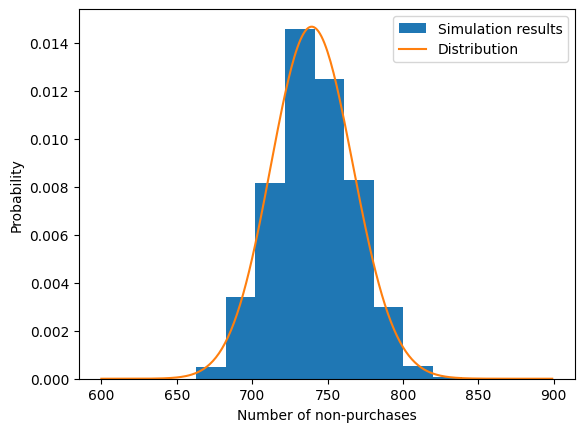

In [7]:


# Define the probabilities of buying something
prob_freq = 1/2
prob_infreq = 1/5

# Define the proportion of frequent and infrequent shoppers
prop_freq = 0.2
prop_infreq = 0.8

# Define the number of simulations
num_simulations = 1000000

# Simulate the number of shoppers and purchases for each simulation
num_shoppers = np.random.poisson(1000, size=num_simulations)
num_purchases = np.zeros(num_simulations)
for i in range(num_simulations):
    num_infreq = np.random.binomial(num_shoppers[i], prop_infreq)
    num_freq = num_shoppers[i] - num_infreq
    num_purchases[i] = np.random.binomial(num_infreq, prob_infreq) + np.random.binomial(num_freq, prob_freq)

# Count the number of simulations that resulted in 300 purchases
mask = num_purchases == 300
num_non_purchases = num_shoppers - num_purchases
num_non_purchases_300 = num_non_purchases[mask]

# Define our lambda and probability
lamda = 1000
p = 0.26

# Plot the distribution of non-purchases
plt.hist(num_non_purchases_300, density=True, label="Simulation results")
x = [i for i in range(600, 900)]
y_dist = sts.poisson(lamda * (1 - p))
plt.plot(x, y_dist.pmf(x), label = "Distribution")
plt.xlabel('Number of non-purchases')
plt.ylabel('Probability')
plt.legend()
plt.show()

We can see that the simulation results match with the probability density distribution very closely, hence we can be confident with our Poisson distribution.

# Problem 3

It is a dark, clear night. A man sits inside his house and gazes at the stars through a square
window. This is what he sees. What is the size of the window?

Assumptions:
- You cannot see the edge of the window since it is completely dark except for the stars
outside.
- The window is perfectly square.
- The stars are points in the sky (they have negligible radius).
- The stars are distributed randomly, uniformly, and independently in the night sky

Guidelines:
- The size (width and height) of the window is $s$ and the center of the window is at $(x,y)$. You need to infer the value of but you should also think about how $x$ and $y$ play a role.
- You need to provide a distribution for $s$. A point estimate is not enough.

Data: The coordinates of the stars are given below. Your estimate for must be in the same
coordinate system as the data.

```
[[5.079, 1.493], [4.341, 1.657], [4.777, 1.811], [4.717, 1.280], [4.484, 1.936],
[4.995, 1.444], [4.924, 1.922], [4.530, 1.720], [4.774, 1.525], [4.658, 2.049],
[4.302, 1.439], [4.341, 1.971], [4.348, 1.919]]
```

First, we assume that the center of the window is 
at the mean of the x-coordinate and y-coordinate
data points.

In [8]:
# Using the data coordinates
data = [[5.079, 1.493], [4.341, 1.657], [4.777, 1.811], [4.717, 1.280], [4.484, 1.936],
        [4.995, 1.444], [4.924, 1.922], [4.530, 1.720], [4.774, 1.525], [4.658, 2.049],
        [4.302, 1.439], [4.341, 1.971], [4.348, 1.919]]
data = np.array(data)

# Getting the center
x, y = np.mean(data[:, 0]), np.mean(data[:, 1])
print(x, y)

4.636153846153847 1.7050769230769234


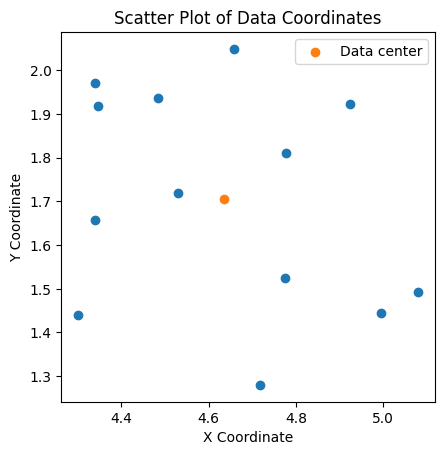

In [9]:
### PLOTTING THE DATA


# Extract the x and y coordinates from the data
x_coords = [data[i][0] for i in range(len(data))]
y_coords = [data[i][1] for i in range(len(data))]

# Create a scatter plot of the data
fig, ax = plt.subplots()

ax.scatter(x_coords, y_coords)

# Add axis labels and a title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of Data Coordinates')
ax.set_aspect('equal', adjustable='box')


ax.scatter(x, y, label="Data center")
plt.legend()
# Show the plot
plt.show()

0.8869469469469471


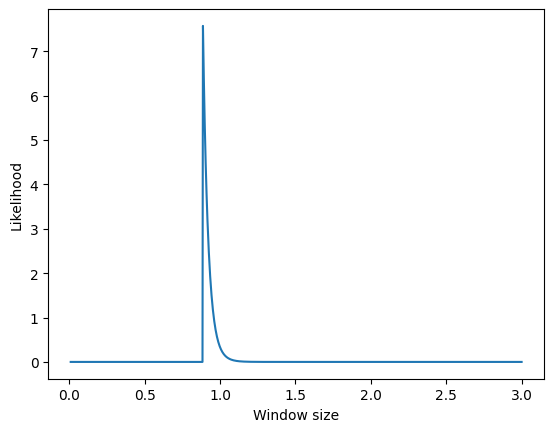

In [51]:

s_values = np.linspace(0.01, 3, 1000)
# Initialize arrays to store priors and likelihoods
priors = np.empty(len(s_values))
likelihoods = np.zeros(len(s_values))

#Fill prior value which is uniformly distributed among all possible s values
priors.fill(1/(3 - 0.01))

# Loop over each candidate size s
for i, s in enumerate(s_values):
    x_min, x_max = x - s/2, x + s/2
    y_min, y_max = y - s/2, y + s/2
    likelihood = priors[i]
    
    for x_val, y_val in data:
        if x_min <= x_val <= x_max and y_min <= y_val <= y_max:
            # PDF of uniform distribution on 1 axis = 1/s
            likelihood *= (1/s)**2
        # if the values that we see are outside of the circle 
        # we can remove this probability
        else:
            likelihood *= 0
            break
    likelihoods[i] = likelihood
    

# Find the value of s that maximizes the likelihood of the observed counts
max_likelihood_index = np.argmax(likelihoods)
print(s_values[max_likelihood_index])

# Print the estimated size of the window
plt.plot(s_values, likelihoods)
plt.ylabel("Likelihood")
plt.xlabel("Window size")
plt.show()

Based on the graph, we can see we have a cutoff point at ~0.8869, as before that it is probably the case that at least one datapoint is outside of the window size. We can also see that the most likely value is at 0.8869, and it decreases as window size increases, which also makes sense because the bigger the window the more likely the probability that we would observe more datapoints beyond the ones we have observed so far.

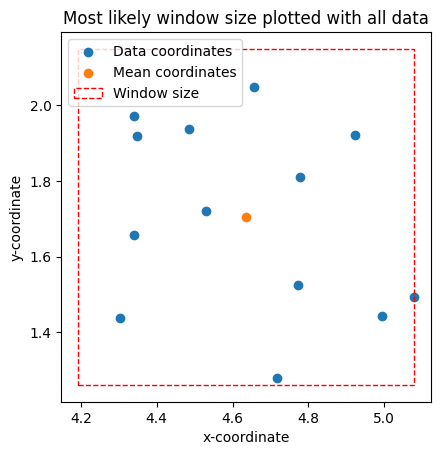

In [68]:
import matplotlib.patches as patches

# Using the data coordinates
data = [[5.079, 1.493], [4.341, 1.657], [4.777, 1.811], [4.717, 1.280], [4.484, 1.936],
        [4.995, 1.444], [4.924, 1.922], [4.530, 1.720], [4.774, 1.525], [4.658, 2.049],
        [4.302, 1.439], [4.341, 1.971], [4.348, 1.919]]

# Extract the x and y coordinates from the data
x_coords = [data[i][0] for i in range(len(data))]
y_coords = [data[i][1] for i in range(len(data))]

# Create a scatter plot of the data
fig, ax = plt.subplots()
ax.scatter(x_coords, y_coords, label="Data coordinates")
ax.scatter(x, y, label="Mean coordinates")
s = s_values[max_likelihood_index]
rect = patches.Rectangle((x - s/2, y - s/2), s, s, linewidth=1, edgecolor='r', 
                         linestyle='--', facecolor='none', label="Window size")
ax.add_patch(rect)
ax.set_aspect('equal', adjustable='box')
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("Most likely window size plotted with all data")
plt.legend()
plt.show()

To get the probability density function, we just need to normalize everything by marginal likelihood.

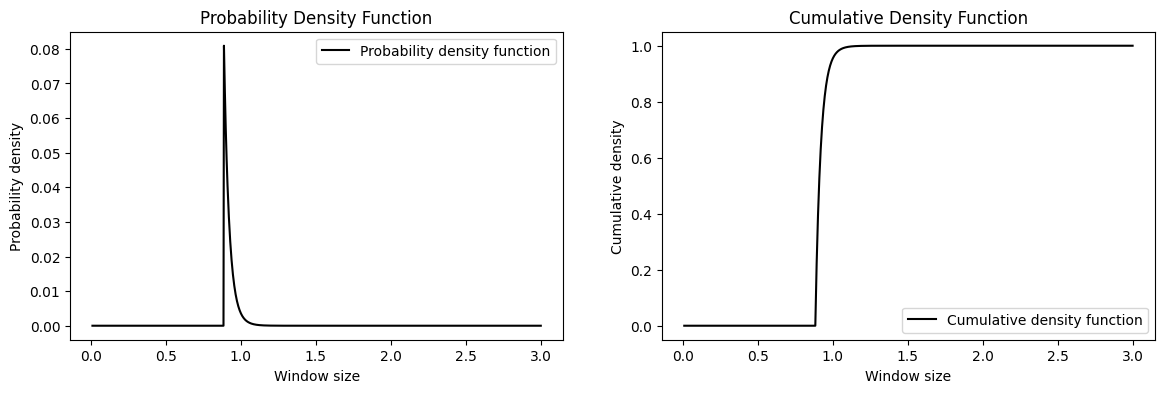

In [70]:
## Normalize everything to get probability density function
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
pdf_vals = [likelihoods[i]/np.cumsum(likelihoods)[-1] for i in range(len(s_values))]
plt.plot(s_values, pdf_vals, color='black',label="Probability density function")
plt.xlabel("Window size")
plt.ylabel("Probability density")
plt.title("Probability Density Function")
plt.legend()

## Plotting cumulative density function
plt.subplot(1, 2, 2)
cdf_vals = np.cumsum(pdf_vals)/np.cumsum(pdf_vals)[-1]
plt.plot(s_values, cdf_vals, color='black',label="Cumulative density function")
plt.xlabel("Window size")
plt.ylabel("Cumulative density")
plt.title("Cumulative Density Function")
plt.legend()
plt.show()


## AI Tool statement
I have not used any AI Tool in this assignment.